In [42]:
from amad.demo.demo_aircraft_resources import CalculateAircraft
from amad.disciplines.design.resources.aircraft_geometry_library import (
        ac_narrow_body_long as airplane_geom,
    )
from amad.optimization.resources.set_parameters import single_aisle_concept
from cosapp.drivers import NonLinearSolver
from smt.sampling_methods import LHS
import pandas

In [43]:
def print_msg(ac_sys):
    """Print Routine

    Args:
        ac_sys (obj): summary of aircraft parameters
    """
    msg = (
        f"Wing Sweep = {ac_sys.delta_wing_sweep[1]}m | "
        + f"Wing Root Chord = {ac_sys.chord_wing_root}m | "
        + f"Wing Taper Ratio = {ac_sys.r_wing_taper[1]} | "
        + f"Wing Span = {ac_sys.x_wing_span[1]}m | "
        + f"Crz fuel = {ac_sys.mass.m_fuel_cruise:.0f}kg | "
        + f"solver code = {ac_sys.drivers['nls'].error_code} "
        
    )
    print(msg)

def run_all(ac_sys):
    calc_perf.run_drivers()
    print_msg(ac_sys)

tolerance = 1e-2
calc_perf_init = CalculateAircraft("calc_perf", airplane_geom=airplane_geom())
calc_perf = single_aisle_concept(calc_perf_init)
calc_perf.add_driver(NonLinearSolver("nls", method="POWELL", tol=tolerance))
calc_perf.m_fuel_climb = 2300.0
calc_perf.m_fuel_descent = 300.0
calc_perf.m_fuel_taxi = 500.0
calc_perf.mass.m_fuel_cruise = 123.0
calc_perf.z_altitude = 11582.4  # cruise altitude
calc_perf.mach_current = 0.75  # cruise mach
calc_perf.thrust_eng = 120000.0
calc_perf.n_pax = 150
calc_perf.x_range = 5000 * 1000.0  # 5000km

# inner_sweep = (31.5 / 23.5) * 

run_all(calc_perf)
calc_perf.chord_wing_root = 8.4
run_all(calc_perf)

Wing Sweep = 23.5m | Wing Root Chord = 8.57m | Wing Taper Ratio = 0.252 | Wing Span = 34.32m | Crz fuel = 27466kg | solver code = 0 
Wing Sweep = 23.5m | Wing Root Chord = 8.4m | Wing Taper Ratio = 0.252 | Wing Span = 34.32m | Crz fuel = 29061kg | solver code = 0 


(50, 4)


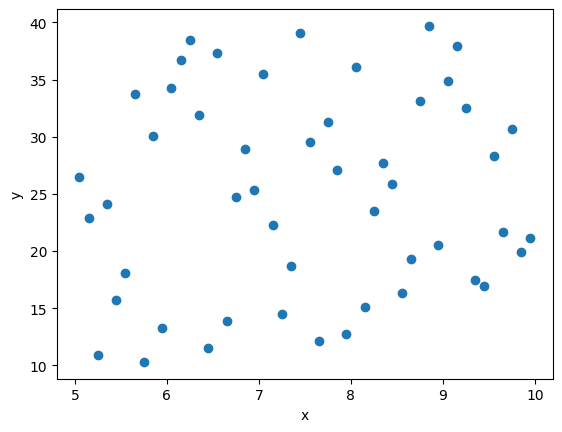

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from smt.sampling_methods import LHS

lim_sweep = [-40., 40.]
lim_r_chord = [5., 10]
lim_taper_r = [.1, .5]
lim_span = [10., 40.]

xlimits = np.array([
    lim_sweep,
    lim_r_chord,
    lim_taper_r,
    lim_span
])

sampling = LHS(xlimits=xlimits)

num = 50
x = sampling(num)

print(x.shape)

plt.plot(x[:, 1], x[:, 3], "o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [41]:
for i in range(0, num):
    outer_sweep = x[:, 0][i]
    inner_sweep = (31.5 / 23.5) * outer_sweep

    calc_perf.delta_wing_sweep = [inner_sweep, outer_sweep]
    calc_perf.chord_wing_root = x[:, 1][i]
    calc_perf.r_wing_taper[1] = x[:, 2][i]
    calc_perf.x_wing_span[1] = x[:, 3][i]

    run_all(calc_perf)
    

Wing Sweep = 2.4000000000000057m | Wing Root Chord = 6.25m | Wing Taper Ratio = 0.36 | Wing Span = 12.1m | Crz fuel = 75608kg | solver code = 0 
Wing Sweep = -21.6m | Wing Root Chord = 5.65m | Wing Taper Ratio = 0.248 | Wing Span = 19.3m | Crz fuel = 12040kg | solver code = 0 
Wing Sweep = 13.600000000000001m | Wing Root Chord = 8.25m | Wing Taper Ratio = 0.45600000000000007 | Wing Span = 39.7m | Crz fuel = 24159kg | solver code = 0 
Wing Sweep = 18.4m | Wing Root Chord = 5.55m | Wing Taper Ratio = 0.368 | Wing Span = 34.900000000000006m | Crz fuel = 42341kg | solver code = 0 
Wing Sweep = -26.400000000000002m | Wing Root Chord = 8.65m | Wing Taper Ratio = 0.192 | Wing Span = 20.5m | Crz fuel = 12732kg | solver code = 0 
Wing Sweep = 20.0m | Wing Root Chord = 6.95m | Wing Taper Ratio = 0.32000000000000006 | Wing Span = 30.1m | Crz fuel = 145878kg | solver code = 0 
Wing Sweep = 0.7999999999999972m | Wing Root Chord = 9.35m | Wing Taper Ratio = 0.24 | Wing Span = 21.1m | Crz fuel = 8138

In [54]:

surrogate_model_data = pandas.DataFrame(x)

surrogate_model_data[[0, 1]].values.tolist()

[[15.200000000000003, 9.45],
 [-5.600000000000001, 6.85],
 [-12.0, 7.8500000000000005],
 [-29.6, 8.45],
 [-37.6, 5.75],
 [-7.199999999999996, 8.85],
 [-2.4000000000000057, 5.05],
 [34.400000000000006, 8.95],
 [-20.0, 8.05],
 [-4.0, 6.15],
 [-36.0, 5.65],
 [-0.7999999999999972, 6.75],
 [-18.4, 5.35],
 [12.0, 7.55],
 [39.2, 6.95],
 [-13.599999999999998, 6.55],
 [31.200000000000003, 5.55],
 [26.400000000000006, 7.75],
 [-10.399999999999999, 7.949999999999999],
 [32.8, 6.45],
 [-34.4, 9.75],
 [29.599999999999994, 7.15],
 [-31.2, 9.25],
 [2.4000000000000057, 9.65],
 [37.599999999999994, 9.35],
 [24.80000000000001, 8.65],
 [-32.8, 9.05],
 [28.0, 6.35],
 [-24.8, 5.25],
 [36.0, 9.85],
 [-21.6, 9.55],
 [7.199999999999996, 6.65],
 [5.6000000000000085, 8.75],
 [0.7999999999999972, 5.95],
 [-16.799999999999997, 5.15],
 [-15.2, 7.25],
 [23.200000000000003, 9.95],
 [16.799999999999997, 7.35],
 [-8.799999999999997, 9.15],
 [-39.2, 8.25],
 [21.6, 7.65],
 [-26.400000000000002, 5.45],
 [4.0, 8.15],
 [-2